In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import os
from moviepy.editor import VideoFileClip
%matplotlib inline

In [2]:
## Step 1: Perform Camera Calibration

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('../calib/Calibration*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        img_corners = cv2.drawChessboardCorners(img, (9,6), corners2, ret)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# return mtx, dist
def undistort(distorted_img):
    return cv2.undistort(distorted_img, mtx, dist, None, mtx)




In [3]:
'''Create Directory'''
output_images_dir = '../output_images'
output_chessboard_coners = os.path.join(output_images_dir, 'chessboard_conners')
if not os.path.isdir(output_chessboard_coners):
    os.makedirs(output_chessboard_coners)

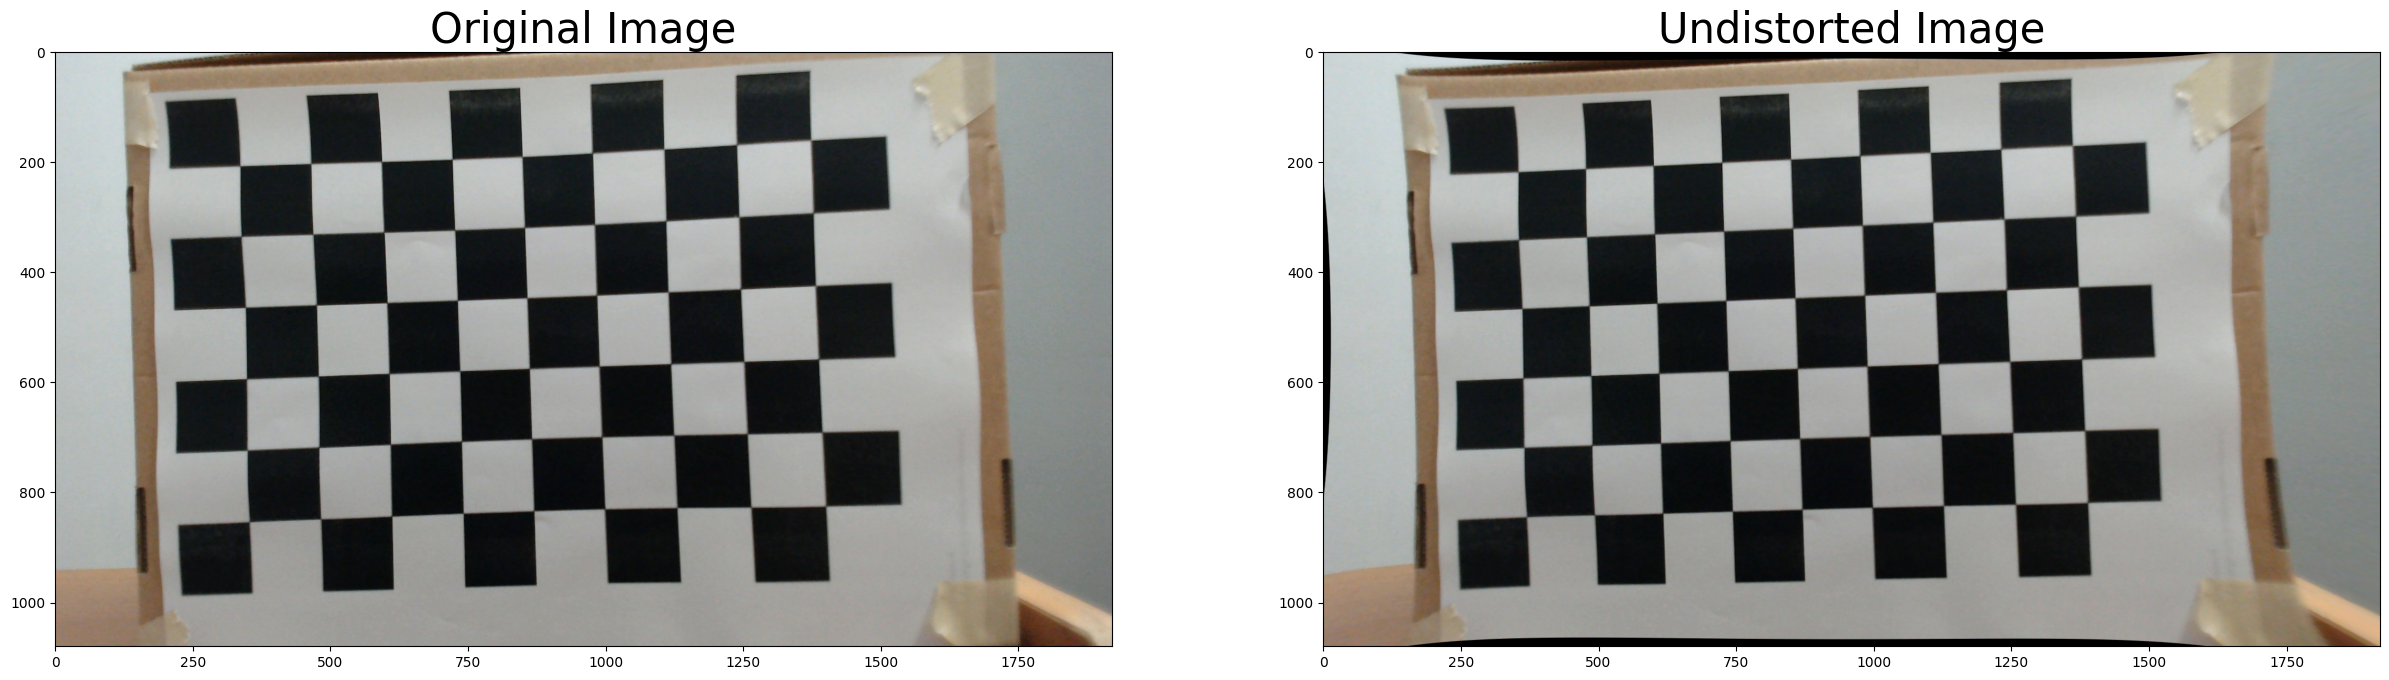

In [4]:
'''Test Undistortion'''

img = mpimg.imread('../calib/Calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = undistort(img)


# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

plt.savefig('../output_images/chessboard_conners//calibresult.jpg')
plt.show()



In [5]:
'''Create Directory'''
output_images_dir = '../output_images'
output_warped_img = os.path.join(output_images_dir, 'warped_test_images')
if not os.path.isdir(output_warped_img):
    os.makedirs(output_warped_img)

In [6]:
## Step 2: Perspective Transform
def warped_birdview(img):
    undist = undistort(img)
    img_size = (img.shape[1], img.shape[0])
    offset = 300
    
    # Source points taken from images with straight lane lines, these are to become parallel after the warp transform
    src = np.float32([
        (190, 720), # bottom-left corner
        (596, 447), # top-left corner
        (685, 447), # top-right corner
        (1125, 720) # bottom-right corner
    ])
    # Destination points are to be parallel, taken into account the image size
    dst = np.float32([
        [offset, img_size[1]],             # bottom-left corner
        [offset, 0],                       # top-left corner
        [img_size[0]-offset, 0],           # top-right corner
        [img_size[0]-offset, img_size[1]]  # bottom-right corner
    ])
    # Calculate the transformation matrix and it's inverse transformation
    M = cv2.getPerspectiveTransform(src, dst)
    M_inv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(undist, M, img_size)
   
    return warped, M_inv


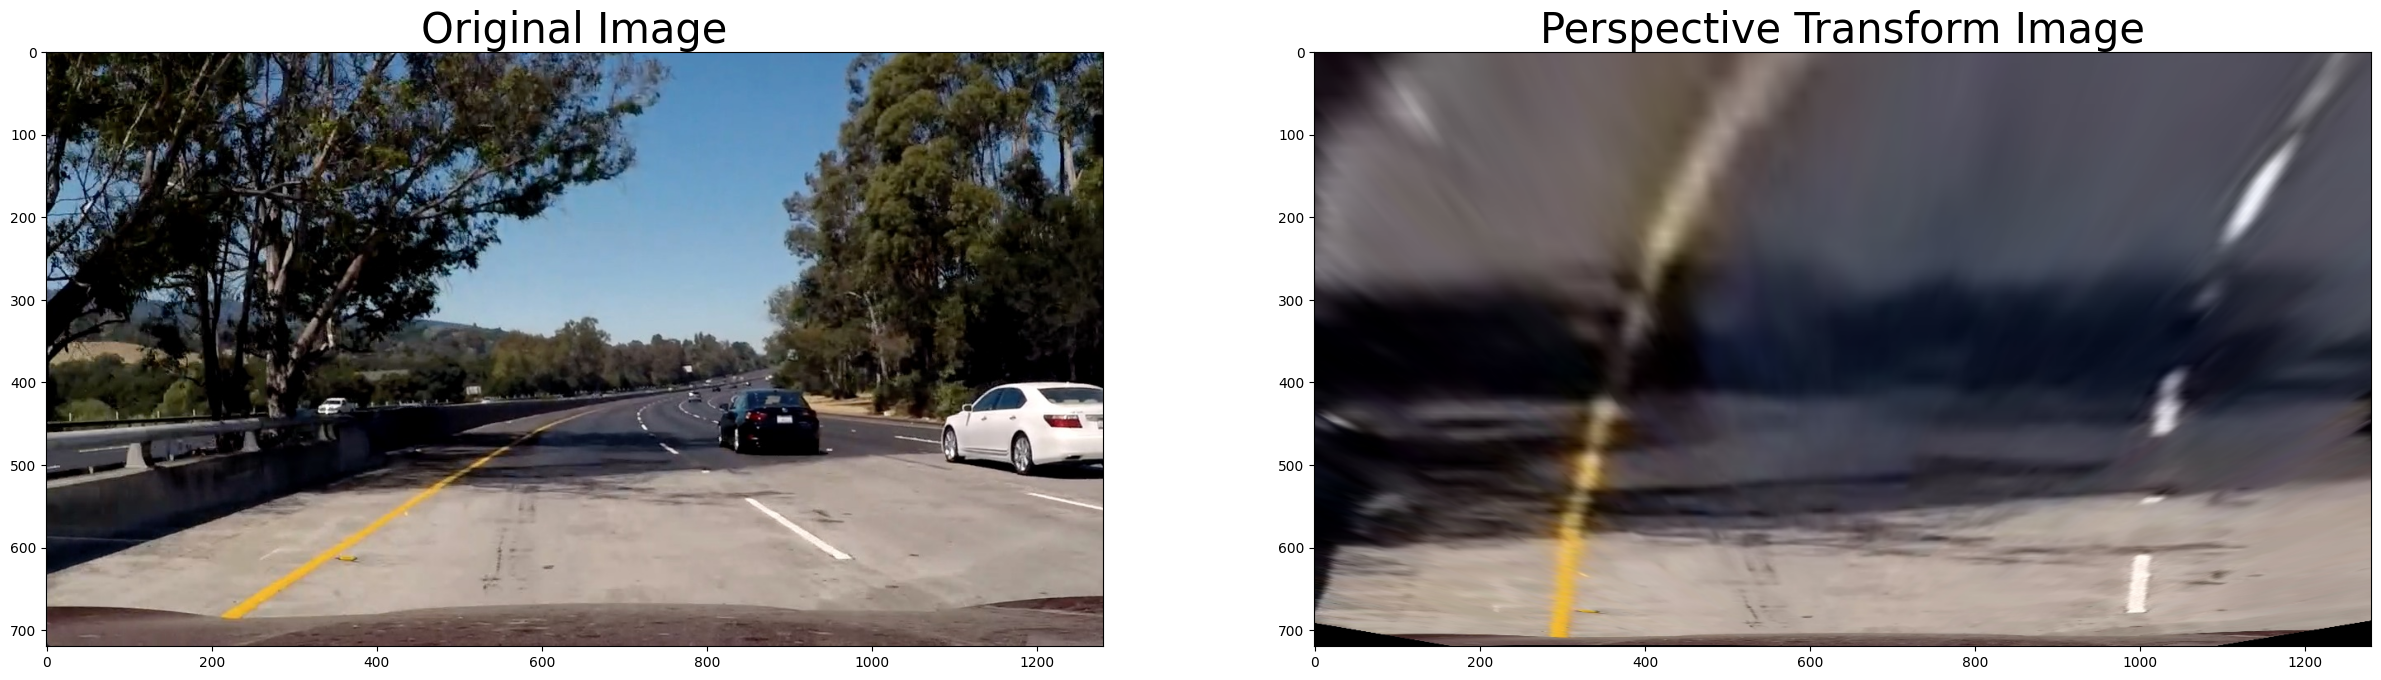

In [7]:
'''Test'''
#img = mpimg.imread('../test_images/straight_lines1.jpg')
#img = mpimg.imread('../test_images/straight_lines2.jpg')
#img = mpimg.imread('../test_images/test1.jpg')
#img = mpimg.imread('../test_images/test2.jpg')
#img = mpimg.imread('../test_images/test3.jpg')
#img = mpimg.imread('../test_images/test4.jpg')
img = mpimg.imread('../test_images/test5.jpg')
#img = mpimg.imread('../test_images/test6.jpg')
warped, M_inv = warped_birdview(img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warped)
ax2.set_title('Perspective Transform Image', fontsize=30)

plt.savefig('../output_images/warped_test_images/warped_result.jpg')
plt.show()

In [8]:
def pipeline(img):
    binary_warped, M_inv =  warped_birdview(img)
    return binary_warped
video_output = '../project_video_output.mp4'
clip1 = VideoFileClip("../challenge_video.mp4")
output_clip = clip1.fl_image(pipeline)
%time output_clip.write_videofile(video_output, audio = False)

Moviepy - Building video ../project_video_output.mp4.
Moviepy - Writing video ../project_video_output.mp4



Moviepy - Done !
Moviepy - video ready ../project_video_output.mp4
CPU times: total: 1min 7s
Wall time: 21.7 s


In [12]:
# video_output = '../project_video_output.mp4'
# clip1 = VideoFileClip("../challenge_video.mp4")
# # output_clip = clip1.fl_image()
# %time output_clip.write_videofile(video_output, audio = False)


AttributeError: 'tuple' object has no attribute 'shape'